In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("orders_with_150_anomalies.csv")
df.head()

,order_id,customer_id,order_date,product_id,product_category,quantity,price_per_unit,total_amount
0,O00001,C039,2023-12-22,P179,Grocery,3,321.62,964.86
1,O00002,C022,2024-10-07,P155,Grocery,10,255.39,-39.35
2,O00003,C021,2024-11-01,P020,Furniture,6,339.14,143.59
3,O00004,C042,2024-10-25,P015,Electronics,4,484.49,1937.96
4,O00005,C038,2024-03-02,P197,Grocery,6,264.45,-114.26


In [3]:
df.tail()

,order_id,customer_id,order_date,product_id,product_category,quantity,price_per_unit,total_amount
145,O00146,C040,2024-08-06,P091,Furniture,9,326.18,NaN
146,O00147,C023,2024-07-05,P078,Books,7,87.84,614.88
147,O00148,C027,2024-09-02,P164,Grocery,3,463.78,1391.34
148,O00149,C038,2023-03-27,P197,Electronics,10,411.30,4113.00
149,O00150,C049,2023-09-01,P169,Grocery,5,63.65,318.25


Question 1 - Basic Overview

In [4]:
#Question 1a - 
#shape of the dataset - 
df.shape

(150, 8)

The shape of the dataset is (150, 8)
ie. number of rows - 150
number of columns - 8

In [5]:
#question 1b - 
print(df.dtypes)

order_id             object
customer_id          object
order_date           object
product_id           object
product_category     object
quantity              int64
price_per_unit      float64
total_amount        float64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          150 non-null    object 
 1   customer_id       150 non-null    object 
 2   order_date        150 non-null    object 
 3   product_id        150 non-null    object 
 4   product_category  150 non-null    object 
 5   quantity          150 non-null    int64  
 6   price_per_unit    150 non-null    float64
 7   total_amount      125 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 9.5+ KB


In [9]:
#Question 1c - 
df.isna().sum()

order_id             0
customer_id          0
order_date           0
product_id           0
product_category     0
quantity             0
price_per_unit       0
total_amount        25
dtype: int64

Question 2 - Customer Behavior

In [10]:
df["customer_id"].nunique()

50

In [11]:
df["customer_id"].unique()

array(['C039', 'C022', 'C021', 'C042', 'C038', 'C011', 'C046', 'C033',
       'C036', 'C012', 'C029', 'C020', 'C007', 'C040', 'C037', 'C018',
       'C027', 'C049', 'C028', 'C005', 'C008', 'C019', 'C014', 'C030',
       'C032', 'C041', 'C047', 'C043', 'C001', 'C048', 'C025', 'C002',
       'C044', 'C045', 'C024', 'C006', 'C010', 'C023', 'C050', 'C035',
       'C031', 'C003', 'C004', 'C034', 'C017', 'C015', 'C016', 'C009',
       'C026', 'C013'], dtype=object)

In [12]:
unique_order = df["order_id"].nunique()
unique_customers = df["customer_id"].nunique()

avg_orders = unique_order/unique_customers
print(avg_orders)

3.0


In [20]:
top_customers = df.groupby("customer_id")["order_id"].nunique().sort_values(ascending=False).head(10).reset_index(name = "Order_count")
print(top_customers)

  customer_id  Order_count
0        C022            8
1        C007            7
2        C021            6
3        C045            6
4        C041            5
5        C040            5
6        C046            5
7        C023            4
8        C018            4
9        C033            4


Question 3 - Order Patterns

In [25]:
df["order_date_datetime"] = pd.to_datetime(df["order_date"])

daily_orders = df.groupby(df["order_date_datetime"].dt.date)["order_id"].nunique().reset_index(name = "Order_count")
print(daily_orders)

    order_date_datetime  Order_count
0            2022-01-14            1
1            2022-01-26            1
2            2022-01-28            1
3            2022-02-02            1
4            2022-02-16            1
..                  ...          ...
129          2024-11-12            2
130          2024-12-13            1
131          2024-12-15            2
132          2024-12-24            1
133          2024-12-28            1

[134 rows x 2 columns]


In [26]:
monthly_orders = df.groupby(df["order_date_datetime"].dt.month)["order_id"].nunique().reset_index(name = "Order_count")
print(monthly_orders)

    order_date_datetime  Order_count
0                     1           10
1                     2            6
2                     3           13
3                     4            9
4                     5           13
5                     6           13
6                     7           15
7                     8           14
8                     9           12
9                    10           18
10                   11           13
11                   12           14


YearWise monthly trend

In [ ]:
monthly_trends_yearwise = df.groupby(df["order_date_datetime"].dt.to_period("M"))["order_id"].nunique().reset_index(name = "Order_count")
print(monthly_trends_yearwise)

In [33]:
yearly_orders = df.groupby(df['order_date_datetime'].dt.year)['order_id'].nunique().reset_index(name = 'Order_count')
print(yearly_orders)

   order_date_datetime  Order_count
0                 2022           40
1                 2023           52
2                 2024           58


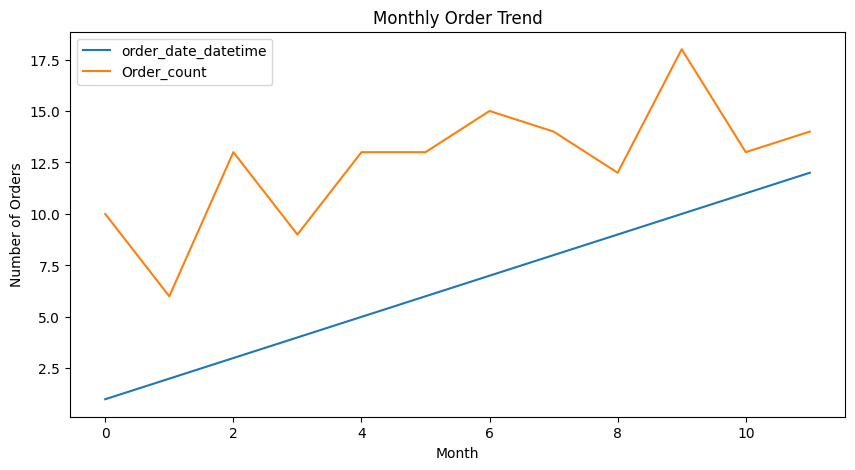

In [29]:
#Monthly Trend
monthly_orders.plot(kind='line', figsize=(10, 5), title='Monthly Order Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

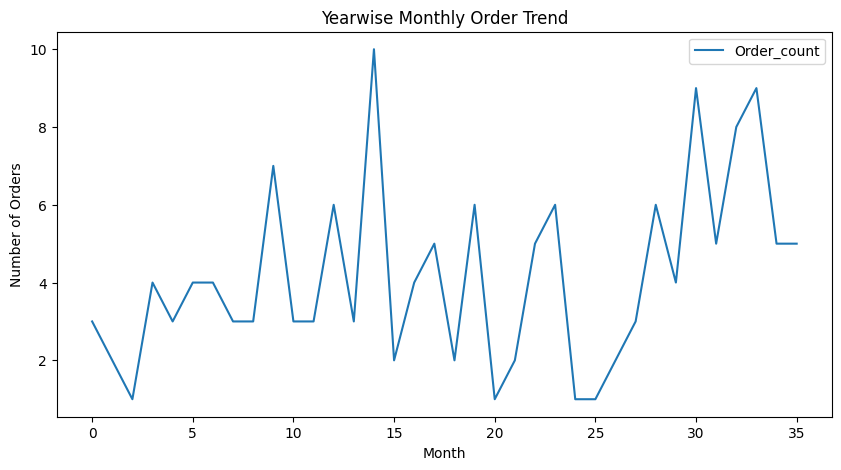

In [30]:
#yearwise monthly trend - 
monthly_trends_yearwise.plot(kind = "line", figsize=(10,5), title="Yearwise Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

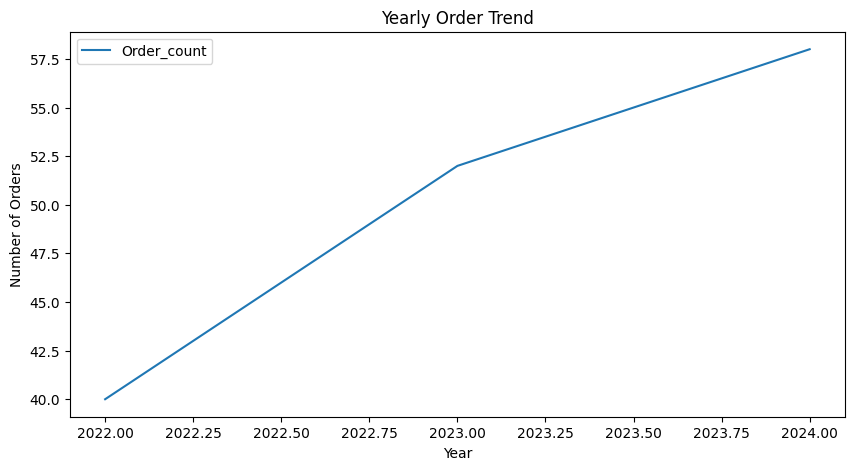

In [36]:
yearly_orders.plot(
    x='order_date_datetime', 
    y='Order_count', 
    kind='line', 
    figsize=(10, 5), 
    title='Yearly Order Trend'
)
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()

3(b) - peak time analysis

In [44]:
df['order_day'] = df['order_date_datetime'].dt.dayofweek
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['order_day_name'] = df['order_day'].map(day_mapping)
weekly_orders = df.groupby('order_day_name')['order_id'].count().sort_values(ascending=False).reset_index(name='Order_count')

print("Peak Order Days:\n", weekly_orders)

Peak Order Days:
   order_day_name  Order_count
0        Tuesday           29
1         Friday           24
2       Saturday           21
3         Sunday           21
4      Wednesday           20
5       Thursday           18
6         Monday           17


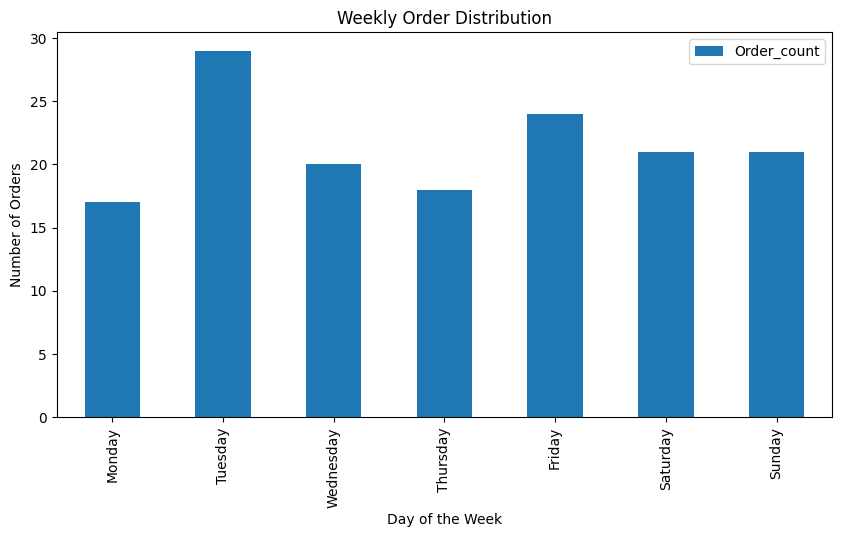

In [46]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_orders = weekly_orders.set_index('order_day_name').reindex(weekday_order).reset_index()

weekly_orders.plot(
    x='order_day_name', 
    y='Order_count', 
    kind='bar', 
    figsize=(10, 5), 
    title='Weekly Order Distribution'
)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


In [62]:
df['order_month'] = df['order_date_datetime'].dt.month
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 
    4: 'April', 5: 'May', 6: 'June', 
    7: 'July', 8: 'August', 9: 'September', 
    10: 'October', 11: 'November', 12: 'December'
}

df['order_month_name'] = df['order_month'].map(month_mapping)
monthly_orders = df.groupby('order_month_name')['order_id'].count().sort_values(ascending=False).reset_index(name='Order_count')

print("Peak Order Months:\n", monthly_orders)


Peak Order Months:
    order_month_name  Order_count
0           October           18
1              July           15
2            August           14
3          December           14
4          November           13
5               May           13
6             March           13
7              June           13
8         September           12
9           January           10
10            April            9
11         February            6


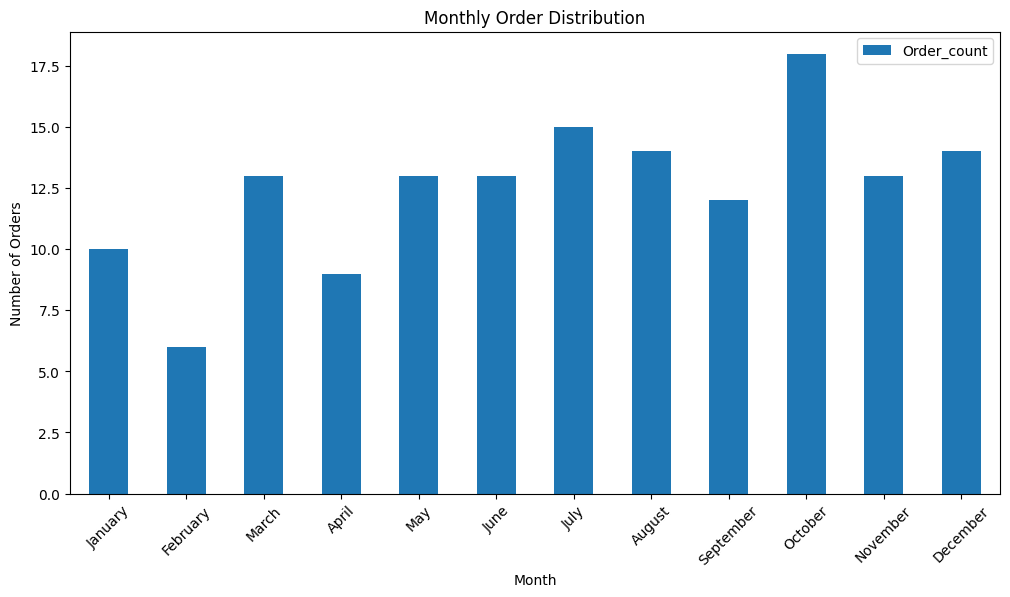

In [48]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_orders = monthly_orders.set_index('order_month_name').reindex(month_order).reset_index()

monthly_orders.plot(
    x='order_month_name', 
    y='Order_count', 
    kind='bar', 
    figsize=(12, 6), 
    title='Monthly Order Distribution'
)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Question 4 - Product Analysis

In [49]:
popular_categories = df.groupby('product_category')['order_id'].count().sort_values(ascending=False).head(1)
print("Most Popular Product Categories:\n", popular_categories)

Most Popular Product Categories:
 product_category
Grocery    45
Name: order_id, dtype: int64


In [50]:
df.head()

,order_id,customer_id,order_date,product_id,product_category,quantity,price_per_unit,total_amount,order_date_datetime,order_day,order_day_name,order_month,order_month_name
0,O00001,C039,2023-12-22,P179,Grocery,3,321.62,964.86,2023-12-22,4,Friday,12,December
1,O00002,C022,2024-10-07,P155,Grocery,10,255.39,-39.35,2024-10-07,0,Monday,10,October
2,O00003,C021,2024-11-01,P020,Furniture,6,339.14,143.59,2024-11-01,4,Friday,11,November
3,O00004,C042,2024-10-25,P015,Electronics,4,484.49,1937.96,2024-10-25,4,Friday,10,October
4,O00005,C038,2024-03-02,P197,Grocery,6,264.45,-114.26,2024-03-02,5,Saturday,3,March


In [52]:
top_products = (
    df.groupby('product_id')
      .agg({'quantity': 'sum', 'product_category': 'first'})  
      .sort_values('quantity', ascending=False)
      .head(10)
      .reset_index()
)

print("Top 10 Best-Selling Products:\n", top_products)

Top 10 Best-Selling Products:
   product_id  quantity product_category
0       P187        28            Books
1       P151        27          Grocery
2       P197        25          Grocery
3       P199        23          Grocery
4       P155        20          Grocery
5       P190        18            Books
6       P169        18          Grocery
7       P168        16        Furniture
8       P164        15      Electronics
9       P096        15      Electronics


In [53]:
avg_quantity_per_category = df.groupby('product_category')['quantity'].mean().sort_values(ascending=False).reset_index(name='Avg_Quantity') 
print("Average Quantity Ordered per Product Category:\n", avg_quantity_per_category)

Average Quantity Ordered per Product Category:
   product_category  Avg_Quantity
0         Clothing      6.250000
1            Books      5.812500
2        Furniture      5.655172
3      Electronics      5.607143
4          Grocery      5.577778


Question 5 - Sales Analysis

In [54]:
total_revenue = df['total_amount'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $152977.67


In [55]:
total_orders = df['order_id'].nunique()
average_order_value = total_revenue / total_orders
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $1019.85


Revenue Patterns

In [57]:
monthly_sales_yearwise = df.groupby(df['order_date_datetime'].dt.to_period('M'))['total_amount'].sum().reset_index(name='Total_Sales')
print("Monthly Sales Trend:\n", monthly_sales_yearwise.head())

Monthly Sales Trend:
   order_date_datetime  Total_Sales
0             2022-01      5880.66
1             2022-02      3073.61
2             2022-03      2865.87
3             2022-04      5426.33
4             2022-05      2308.18


In [59]:
monthly_sales = df.groupby(df["order_date_datetime"].dt.month.rename("Order_month"))["total_amount"].sum().reset_index(name = "Total_Sales")
print(monthly_sales)

    Order_month  Total_Sales
0             1     11843.77
1             2      9655.57
2             3     14723.79
3             4      8548.59
4             5     10732.66
5             6     11304.34
6             7     21872.87
7             8     10792.17
8             9      8842.89
9            10      9121.32
10           11     18063.71
11           12     17475.99


In [71]:
yearly_sales = df.groupby(df["order_date_datetime"].dt.year.rename("Order_year"))["total_amount"].sum().reset_index(name = "Total_Sales")
print(yearly_sales)

   Order_year  Total_Sales
0        2022     38355.91
1        2023     60146.93
2        2024     54474.83


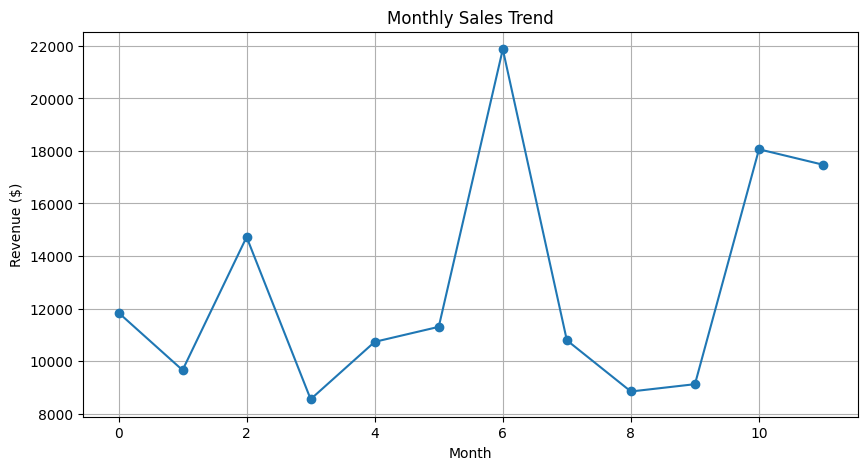

In [70]:
monthly_sales["Total_Sales"].plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

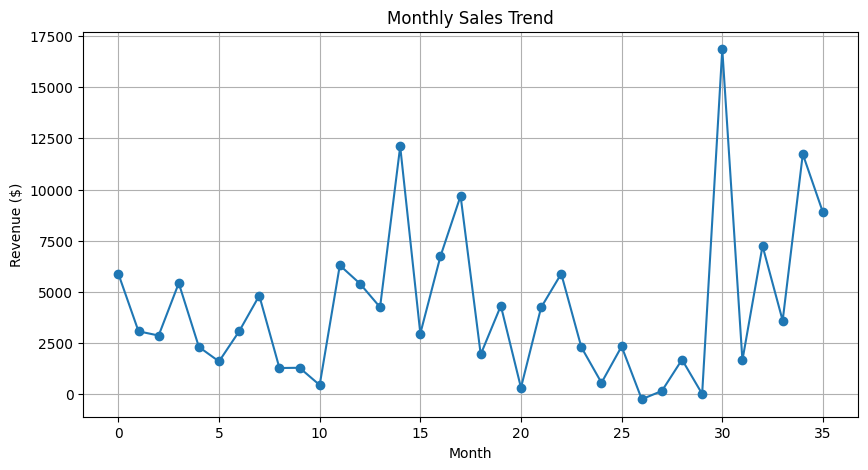

In [65]:
monthly_sales_yearwise["Total_Sales"].plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

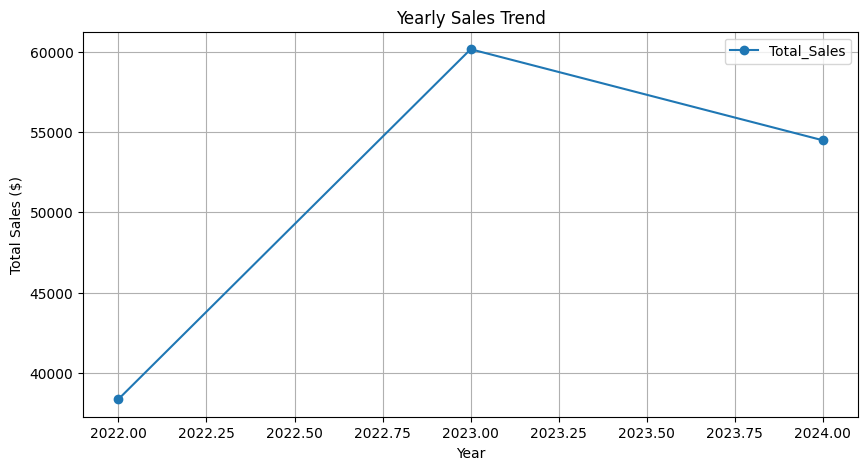

In [76]:
yearly_sales.plot(
    x='Order_year', 
    y='Total_Sales', 
    kind='line', 
    marker='o', 
    figsize=(10, 5), 
    title='Yearly Sales Trend'
)

plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.grid(True)

plt.show()